# A hybrid model including independent component analysis and neural network for forecasting temperature in Sweden

Independent component analysis (ICA) is used to separate blind sources of data. In fact, independent component analysis converts complicated and dependent variables to independent variables whose prediction would be easier. Then the idea of this research is to use a hybrid model including ICA and neural network to forecast data. In complicated and dependent data, ICA can first be used as a technique to recognize the independent source of data and then use different models like neural networks to forecast independent data. The main purpose of this research is to investigate the following research questions:

1. Evaluate and compare the performance of different hybrid model to forecast temperature in Sweden.

2. Apply this model to forecast other Applications (financial dataset) if applicable.

3. Adopting algorithms to spark framework to make them more efficient.


In this research project, our focus is on assessing the performance of various forecasting models for weather data across four cities in Sweden (Malmö, Stockholm, Gothenburg, and Uppsala). The primary objective is to conduct a comparative analysis among different models, considering key evaluation metrics, specifically the Mean Squared Error (MSE) and Mean Absolute Percentage Error (MAPE). These metrics serve as crucial indicators for evaluating the accuracy of predictions, as outlined below.

### Mean Squared Error (MSE):
- **Definition:** MSE is a measure of the average squared difference between predicted values and the actual values.
- **Calculation:** For a set of predictions $\( \hat{y}_i \)$ and actual values $\( y_i \)$ for $\( i = 1, 2, ..., n \)$, MSE is calculated as:
  $\[ \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (\hat{y}_i - y_i)^2 \]$
- **Properties:**
  - It penalizes larger errors more heavily than smaller errors due to the squaring.
  - It is always non-negative, and a value of 0 indicates a perfect prediction.

### Mean Absolute Percentage Error (MAPE):
- **Definition:** MAPE measures the average absolute percentage difference between predicted and actual values.
- **Calculation:** For a set of predictions $\( \hat{y}_i \)$ and actual values $\( y_i \)$ for $\( i = 1, 2, ..., n \)$, MAPE is calculated as:
  $\[ \text{MAPE} = \frac{1}{n} \sum_{i=1}^{n} \left| \frac{\hat{y}_i - y_i}{y_i} \right| \times 100\% \]$
- **Properties:**
  - MAPE is expressed as a percentage, making it interpretable and easy to understand.
  - It is sensitive to large percentage errors and can be influenced by zero or small actual values.

### Interpretation:
- **MSE:** A lower MSE indicates better model performance. However, it may not be as intuitive in terms of scale since it involves squared differences.
- **MAPE:** A lower MAPE also indicates better model performance, and it is expressed as a percentage, making it more interpretable. However, it has limitations when dealing with actual values close to or equal to zero.

When evaluating forecasting models, it's common to consider both MSE and MAPE to get a comprehensive understanding of prediction accuracy, as they capture different aspects of errors in predictions.

### Dataset:

The Meteostat Python library is a powerful tool for accessing and analyzing historical weather and climate data. It provides a seamless interface to Meteostat's vast archive of meteorological data, enabling you to retrieve and manipulate weather observations from thousands of stations worldwide.

Key features of the Meteostat Python library include:

1. **Efficient Data Retrieval:** The library offers efficient mechanisms for fetching weather data, allowing you to retrieve historical records and climate statistics with ease.
2. **Integration with Pandas:** The library seamlessly integrates with Pandas, a popular data analysis framework in Python. This enables you to handle and manipulate weather data using familiar Pandas data structures and operations.
3. **Wide Range of Data Sources:** The library provides access to data from various sources, including national weather services like NOAA and DWD, ensuring a comprehensive coverage of meteorological data.
4. **Flexible Data Filtering:** The library allows to filter and customize your data retrieval based on various criteria, such as location, time range, and specific weather parameters.
5. **Versatile Data Analysis:** The library empowers to perform various data analysis tasks, such as visualizing trends, identifying patterns, and extracting insights from weather data.

In this analysis, we will utilize Air Temperature dataset spanning from January 2000 to December 2022 on a daily basis, focusing on the specified cities (Malmö, Stockholm, Gothenburg, and Uppsala). The dataset aggregates information from various weather stations within each city to provide a comprehensive analysis of weather patterns over the specified timeframe.



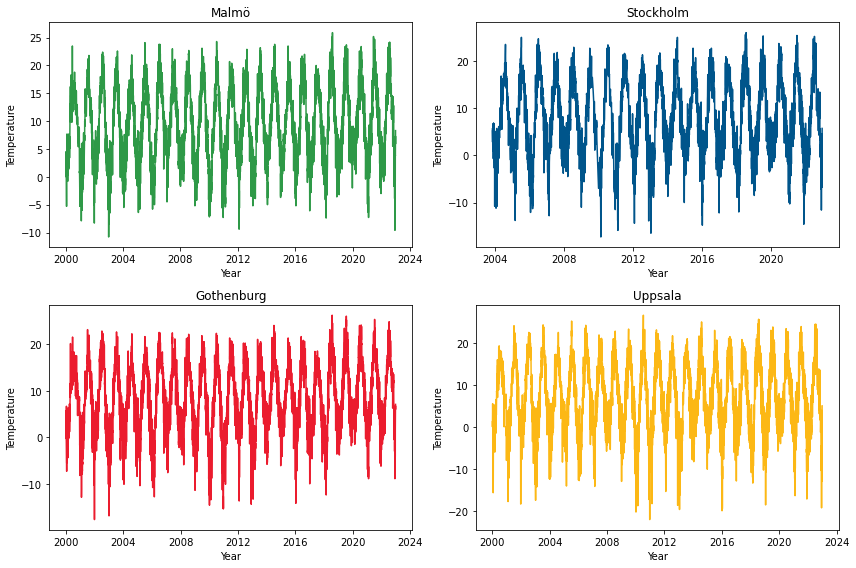

In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Daily

# Set time period
start = datetime(2000, 1, 1)
end = datetime(2022, 12, 31)

# Function to fetch weather data for a given city
def fetch_weather_data(latitude, longitude, city_name):
    location = Point(latitude, longitude)
    data = Daily(location, start, end).fetch()
    weather_data = pd.DataFrame({
        'Day': data.index,
        'City': city_name,
        'Temperature': data['tavg']
    })
    return weather_data.dropna()

# Fetch weather data for each city
weather_data_malmo = fetch_weather_data(55.6050, 13.0038, 'Malmö')
weather_data_stockholm = fetch_weather_data(59.3293, 18.0686, 'Stockholm')
weather_data_gothenburg = fetch_weather_data(57.7089, 11.9746, 'Gothenburg')
weather_data_uppsala = fetch_weather_data(59.8585, 17.6389, 'Uppsala')

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot temperature for Malmö
axs[0, 0].plot(weather_data_malmo['Temperature'], color='#2E9947')
axs[0, 0].set_title('Malmö')

# Plot temperature for Stockholm
axs[0, 1].plot(weather_data_stockholm['Temperature'], color='#00558B')
axs[0, 1].set_title('Stockholm')

# Plot temperature for Gothenburg
axs[1, 0].plot(weather_data_gothenburg['Temperature'], color='#EB1C2E')
axs[1, 0].set_title('Gothenburg')

# Plot temperature for Uppsala
axs[1, 1].plot(weather_data_uppsala['Temperature'], color='#FCB815')
axs[1, 1].set_title('Uppsala')

# Set common labels
for ax in axs.flat:
    ax.set(xlabel='Year', ylabel='Temperature')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [9]:
import pandas as pd
from scipy.stats import skew, kurtosis, jarque_bera
from tabulate import tabulate

# Assuming you have the weather_data_* datasets available

# Function to generate a summary report for a given city
def generate_city_summary(city_name, weather_data):
    summary = f"### {city_name}:\n"
    summary += f"- **Data Points:** {len(weather_data)}\n"
    summary += f"- **Temperature Statistics:**\n\n"
    summary += tabulate([
        ['Mean', weather_data['Temperature'].mean()],
        ['Median', weather_data['Temperature'].median()],
        ['Maximum', weather_data['Temperature'].max()],
        ['Minimum', weather_data['Temperature'].min()],
        ['Std. Dev.', weather_data['Temperature'].std()],
        ['Skewness', skew(weather_data['Temperature'])],
        ['Kurtosis', kurtosis(weather_data['Temperature'])],
        ['Jarque–Bera', jarque_bera(weather_data['Temperature'])[0]],
        ['Probability', jarque_bera(weather_data['Temperature'])[1]],
        ['Observations', len(weather_data)],
    ], headers=['Statistic', 'Value'], tablefmt='github')
    summary += "\n\n"
    return summary

# Generate city-wise summaries
malmo_summary = generate_city_summary('Malmö', weather_data_malmo)
stockholm_summary = generate_city_summary('Stockholm', weather_data_stockholm)
gothenburg_summary = generate_city_summary('Gothenburg', weather_data_gothenburg)
uppsala_summary = generate_city_summary('Uppsala', weather_data_uppsala)

# Overall report
overall_report = (
    "## Summary Observations City -Wise\n\n"
    f"{malmo_summary}{stockholm_summary}{gothenburg_summary}{uppsala_summary}"
)

# Print or save the overall report as needed
print(overall_report)


## Summary Observations City -Wise

### Malmö:
- **Data Points:** 7976
- **Temperature Statistics:**

| Statistic    |        Value |
|--------------|--------------|
| Mean         |    9.45395   |
| Median       |    9.3       |
| Maximum      |   25.9       |
| Minimum      |  -10.8       |
| Std. Dev.    |    6.66028   |
| Skewness     |   -0.0508563 |
| Kurtosis     |   -0.872631  |
| Jarque–Bera  |  256.505     |
| Probability  |    0         |
| Observations | 7976         |

### Stockholm:
- **Data Points:** 5780
- **Temperature Statistics:**

| Statistic    |        Value |
|--------------|--------------|
| Mean         |    7.7983    |
| Median       |    7.4       |
| Maximum      |   26         |
| Minimum      |  -17.3       |
| Std. Dev.    |    7.68794   |
| Skewness     |   -0.0546082 |
| Kurtosis     |   -0.710147  |
| Jarque–Bera  |  124.327     |
| Probability  |    0         |
| Observations | 5780         |

### Gothenburg:
- **Data Points:** 8388
- **Temperature St

## Defining our models functions:

In this analyisi we aim to forecast our data set using a set of different models in each model we calculate the mse and MAPE to compare between the models when predicting our forecasted data, the models included here are:

Here's a brief summary of the mentioned models:

1. **ARIMA (AutoRegressive Integrated Moving Average):**
   - **Type:** Time series forecasting model.
   - **Characteristics:** Utilizes past values in the time series to make predictions, involving autoregressive and moving average components.
   - **Application:** Effective for stationary time series data with a clear trend or seasonality.

2. **GARCH (Generalized Autoregressive Conditional Heteroskedasticity):**
   - **Type:** Econometric model used in finance for volatility forecasting.
   - **Characteristics:** Models the volatility of financial returns, accounting for time-varying volatility.
   - **Application:** Commonly employed in financial markets to predict and manage risk.

3. **ARIMA-GARCH:**
   - **Type:** Hybrid model combining features of ARIMA and GARCH.
   - **Characteristics:** Incorporates both time series and volatility components, making it suitable for datasets with both trends and changing variances.
   - **Application:** Particularly useful in financial time series forecasting.

4. **KNN (K-Nearest Neighbors):**
   - **Type:** Machine learning algorithm.
   - **Characteristics:** Classifies or predicts based on the majority class of its k-nearest neighbors in the feature space.
   - **Application:** Versatile algorithm used for classification and regression tasks in various domains.

5. **RNN (Recurrent Neural Network):**
   - **Type:** Deep learning model for sequence data.
   - **Characteristics:** Incorporates feedback loops, allowing information persistence, making it suitable for sequential and time series data.
   - **Application:** Effective in tasks such as natural language processing and time series forecasting.

6. **ICA-RNN (Independent Component Analysis - Recurrent Neural Network):**
   - **Type:** Hybrid model combining Independent Component Analysis and Recurrent Neural Network.
   - **Characteristics:** Utilizes ICA for feature extraction before feeding the data into an RNN for sequential processing.
   - **Application:** Useful in scenarios where independent components need to be identified before sequential modeling.


In [2]:
import requests
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from arch import arch_model
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.decomposition import FastICA
from sklearn.preprocessing import MinMaxScaler



# ARIMA Model
def arima_model(data):
    train_size = int(len(data) * 0.8)
    train, test = data[:train_size], data[train_size:]
    model = ARIMA(train, order=(5, 1, 2))
    model_fit = model.fit()
    predictions = model_fit.forecast(steps=len(test))
    mse = mean_squared_error(test, predictions)
    mape = mean_absolute_error(test, predictions) / np.mean(np.abs(test))
    return mse, mape


# GARCH Model
def garch_model(data):
    # split into train/test
    n_test = int(len(data) * 0.8)
    train, test = data[:-n_test], data[-n_test:]
    # define model
    model = arch_model(train, mean='Zero', vol='GARCH', p=15, q=15)
    # fit model
    model_fit = model.fit()
    # forecast the test set
    forecasts = model_fit.forecast(horizon=n_test)
    # plot the actual variance
    predictions = np.sqrt(forecasts.variance.values[-1, :])
    mse = mean_squared_error(test, predictions)
    mape = mean_absolute_error(test, predictions) / np.mean(np.abs(test))
    return mse, mape


# ARIMA-GARCH Model
def arima_garch_model(data):
    # Combine ARIMA and GARCH models
    arima_mse, arima_mape = arima_model(data)
    garch_mse, garch_mape = garch_model(data)
    combined_mse = arima_mse + garch_mse
    combined_mape = arima_mape + garch_mape
    return combined_mse, combined_mape


# KNN Model
def knn_model(data):
    train_size = int(len(data) * 0.8)
    train, test = data[:train_size], data[train_size:]
    train = train.values.reshape(-1, 1)
    test = test.values.reshape(-1, 1)
    scaler = MinMaxScaler()
    train_scaled = scaler.fit_transform(train)
    test_scaled = scaler.transform(test)
    X_train, y_train = train_scaled[:-1], train_scaled[1:]
    X_test, y_test = test_scaled[:-1], test_scaled[1:]
    model = KNeighborsRegressor(n_neighbors=5)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    mape = mean_absolute_error(y_test, predictions) / np.mean(np.abs(y_test))
    return mse, mape


# LSTM Model
def rnn_model(data):
    train_size = int(len(data) * 0.8)
    train, test = data[:train_size], data[train_size:]
    train = train.values.reshape(-1, 1)
    test = test.values.reshape(-1, 1)
    scaler = MinMaxScaler()
    train_scaled = scaler.fit_transform(train)
    test_scaled = scaler.transform(test)
    X_train, y_train = train_scaled[:-1], train_scaled[1:]
    X_test, y_test = test_scaled[:-1], test_scaled[1:]

    # Reshape data for LSTM model
    X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

    model = Sequential()
    model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')

    model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)
    predictions = model.predict(X_test, verbose=0)

    mse = mean_squared_error(y_test, predictions)
    mape = mean_absolute_error(y_test, predictions) / np.mean(np.abs(y_test))
    return mse, mape


# ICA-RNN Model
def ica_rnn_model(data):
    train_size = int(len(data) * 0.8)
    train, test = data[:train_size], data[train_size:]
    train = train.values.reshape(-1, 1)
    test = test.values.reshape(-1, 1)
    scaler = MinMaxScaler()
    train_scaled = scaler.fit_transform(train)
    test_scaled = scaler.transform(test)
    X_train, y_train = train_scaled[:-1], train_scaled[1:]
    X_test, y_test = test_scaled[:-1], test_scaled[1:]

    # Apply FastICA for dimensionality reduction
    ica = FastICA(n_components=5)
    X_train_ica = ica.fit_transform(X_train)
    X_test_ica = ica.transform(X_test)

    # Reshape data for LSTM model
    X_train_ica = X_train_ica.reshape((X_train_ica.shape[0], 1, X_train_ica.shape[1]))
    X_test_ica = X_test_ica.reshape((X_test_ica.shape[0], 1, X_test_ica.shape[1]))

    model = Sequential()
    model.add(LSTM(50, input_shape=(X_train_ica.shape[1], X_train_ica.shape[2])))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')

    model.fit(X_train_ica, y_train, epochs=50, batch_size=32, verbose=0)
    predictions = model.predict(X_test_ica, verbose=0)

    mse = mean_squared_error(y_test, predictions)
    mape = mean_absolute_error(y_test, predictions) / np.mean(np.abs(y_test))
    return mse, mape

## Results Analysis:
After defining our function, we utilize our dataset to compare model performances across the four cities. The code below iterates through the datasets of each city, calculating Mean Squared Error (MSE) and Mean Absolute Percentage Error (MAPE) for various forecasting models. The results are then presented in tables for each city.
The function below assesses and compares the predictive accuracy of the specified models, showcasing the performance metrics for each city in tabular form.


In [3]:
# Function to apply models and display results
from tabulate import tabulate
def evaluate_models(data, city_name):
    temperature_data = data['Temperature']

    arima_mse, arima_mape = arima_model(temperature_data)
    garch_mse, garch_mape = garch_model(temperature_data)
    arima_garch_mse, arima_garch_mape = arima_garch_model(temperature_data)
    knn_mse, knn_mape = knn_model(temperature_data)
    rnn_mse, rnn_mape = rnn_model(temperature_data)
    ica_rnn_mse, ica_rnn_mape = ica_rnn_model(temperature_data)
    results = [
        ['ARIMA', arima_mse, arima_mape],
        ['GARCH', garch_mse, garch_mape],
        ['ARIMA-GARCH', arima_garch_mse, arima_garch_mape],
        ['KNN', knn_mse, knn_mape],
        ['RNN', rnn_mse, rnn_mape],
        ['ICA-RNN', ica_rnn_mse, ica_rnn_mape],
    ]

    headers = ['Model', 'MSE', 'MAPE']

    print(f"\nResults for {city_name}:\n")
    print(tabulate(results, headers=headers, tablefmt='pretty'))

In [4]:
# Model Evaluate
evaluate_models(weather_data_malmo, 'Malmö')
evaluate_models(weather_data_stockholm, 'Stockholm')
evaluate_models(weather_data_gothenburg, 'Gothenburg')
evaluate_models(weather_data_uppsala, 'Uppsala')

Iteration:      1,   Func. Count:     33,   Neg. LLF: 7878.959647647023
Iteration:      2,   Func. Count:     66,   Neg. LLF: 208511770.21815246
Iteration:      3,   Func. Count:     99,   Neg. LLF: 459972.0061741651
Iteration:      4,   Func. Count:    132,   Neg. LLF: 5888.2569102979905
Iteration:      5,   Func. Count:    165,   Neg. LLF: 5768.4529858278365
Iteration:      6,   Func. Count:    198,   Neg. LLF: 5727.606392643984
Iteration:      7,   Func. Count:    231,   Neg. LLF: 5701.606642549076
Iteration:      8,   Func. Count:    264,   Neg. LLF: 5675.009196773528
Iteration:      9,   Func. Count:    297,   Neg. LLF: 5493.38499610125
Iteration:     10,   Func. Count:    330,   Neg. LLF: 5421.192731493667
Iteration:     11,   Func. Count:    363,   Neg. LLF: 15664.70626562599
Iteration:     12,   Func. Count:    396,   Neg. LLF: 5504.381771313584
Iteration:     13,   Func. Count:    429,   Neg. LLF: 6475.385096878337
Iteration:     14,   Func. Count:    462,   Neg. LLF: 5684.298

Iteration:      1,   Func. Count:     33,   Neg. LLF: 7878.959647647023
Iteration:      2,   Func. Count:     66,   Neg. LLF: 208511770.21815246
Iteration:      3,   Func. Count:     99,   Neg. LLF: 459972.0061741651
Iteration:      4,   Func. Count:    132,   Neg. LLF: 5888.2569102979905
Iteration:      5,   Func. Count:    165,   Neg. LLF: 5768.4529858278365
Iteration:      6,   Func. Count:    198,   Neg. LLF: 5727.606392643984
Iteration:      7,   Func. Count:    231,   Neg. LLF: 5701.606642549076
Iteration:      8,   Func. Count:    264,   Neg. LLF: 5675.009196773528
Iteration:      9,   Func. Count:    297,   Neg. LLF: 5493.38499610125
Iteration:     10,   Func. Count:    330,   Neg. LLF: 5421.192731493667
Iteration:     11,   Func. Count:    363,   Neg. LLF: 15664.70626562599
Iteration:     12,   Func. Count:    396,   Neg. LLF: 5504.381771313584
Iteration:     13,   Func. Count:    429,   Neg. LLF: 6475.385096878337
Iteration:     14,   Func. Count:    462,   Neg. LLF: 5684.298


Results for Malmö:

+-------------+-----------------------+---------------------+
|    Model    |          MSE          |        MAPE         |
+-------------+-----------------------+---------------------+
|    ARIMA    |  137.10726613990792   |  0.974829814297342  |
|    GARCH    |   48.07138293886066   | 0.5778594581679601  |
| ARIMA-GARCH |   185.1786490787686   |  1.552689272465302  |
|     KNN     | 0.002514509089335745  | 0.06823154234443078 |
|     RNN     | 0.0023133556320872454 | 0.06410958854699642 |
|   ICA-RNN   | 0.0022828820338133193 | 0.06393480788011491 |
+-------------+-----------------------+---------------------+


Iteration:      1,   Func. Count:     33,   Neg. LLF: 4001.917918624203
Iteration:      2,   Func. Count:     65,   Neg. LLF: 5905.876307705324
Iteration:      3,   Func. Count:     98,   Neg. LLF: 6607.6274057535975
Iteration:      4,   Func. Count:    131,   Neg. LLF: 4138.489953944294
Iteration:      5,   Func. Count:    166,   Neg. LLF: 5930.135125313296
Iteration:      6,   Func. Count:    200,   Neg. LLF: 4161.995981633208
Iteration:      7,   Func. Count:    234,   Neg. LLF: 4004.6233379321793
Iteration:      8,   Func. Count:    267,   Neg. LLF: 3986.785396186602
Iteration:      9,   Func. Count:    300,   Neg. LLF: 3980.6664838967445
Iteration:     10,   Func. Count:    333,   Neg. LLF: 3980.0702769465233
Iteration:     11,   Func. Count:    366,   Neg. LLF: 3976.182573336729
Iteration:     12,   Func. Count:    398,   Neg. LLF: 3976.025121649317
Iteration:     13,   Func. Count:    430,   Neg. LLF: 3980.99925078702
Iteration:     14,   Func. Count:    463,   Neg. LLF: 3976.16

Iteration:      1,   Func. Count:     33,   Neg. LLF: 4001.917918624203
Iteration:      2,   Func. Count:     65,   Neg. LLF: 5905.876307705324
Iteration:      3,   Func. Count:     98,   Neg. LLF: 6607.6274057535975
Iteration:      4,   Func. Count:    131,   Neg. LLF: 4138.489953944294
Iteration:      5,   Func. Count:    166,   Neg. LLF: 5930.135125313296
Iteration:      6,   Func. Count:    200,   Neg. LLF: 4161.995981633208
Iteration:      7,   Func. Count:    234,   Neg. LLF: 4004.6233379321793
Iteration:      8,   Func. Count:    267,   Neg. LLF: 3986.785396186602
Iteration:      9,   Func. Count:    300,   Neg. LLF: 3980.6664838967445
Iteration:     10,   Func. Count:    333,   Neg. LLF: 3980.0702769465233
Iteration:     11,   Func. Count:    366,   Neg. LLF: 3976.182573336729
Iteration:     12,   Func. Count:    398,   Neg. LLF: 3976.025121649317
Iteration:     13,   Func. Count:    430,   Neg. LLF: 3980.99925078702
Iteration:     14,   Func. Count:    463,   Neg. LLF: 3976.16


Results for Stockholm:

+-------------+-----------------------+---------------------+
|    Model    |          MSE          |        MAPE         |
+-------------+-----------------------+---------------------+
|    ARIMA    |   64.06761010246835   | 0.7147668700720448  |
|    GARCH    |   58.11343753700777   | 0.7166426244345679  |
| ARIMA-GARCH |  122.18104763947612   | 1.4314094945066127  |
|     KNN     | 0.0034074851005977632 | 0.07745660787605083 |
|     RNN     | 0.002724581206571203  | 0.06823133786723073 |
|   ICA-RNN   | 0.0028385738998010497 | 0.06887844678997855 |
+-------------+-----------------------+---------------------+


Iteration:      1,   Func. Count:     33,   Neg. LLF: 146754.9592607817
Iteration:      2,   Func. Count:     66,   Neg. LLF: 86256097.06454495
Iteration:      3,   Func. Count:    100,   Neg. LLF: 397622.5011373268
Iteration:      4,   Func. Count:    133,   Neg. LLF: 5967.460312626488
Iteration:      5,   Func. Count:    166,   Neg. LLF: 5944.636379980742
Iteration:      6,   Func. Count:    199,   Neg. LLF: 5838.235548589042
Iteration:      7,   Func. Count:    233,   Neg. LLF: 5811.747929628867
Iteration:      8,   Func. Count:    265,   Neg. LLF: 5800.40177906371
Iteration:      9,   Func. Count:    298,   Neg. LLF: 5884.042646836931
Iteration:     10,   Func. Count:    332,   Neg. LLF: 5784.792010204387
Iteration:     11,   Func. Count:    365,   Neg. LLF: 5782.1707593594165
Iteration:     12,   Func. Count:    398,   Neg. LLF: 5777.668130812899
Iteration:     13,   Func. Count:    431,   Neg. LLF: 5777.4155580234265
Iteration:     14,   Func. Count:    464,   Neg. LLF: 5784.8985

Iteration:      1,   Func. Count:     33,   Neg. LLF: 146754.9592607817
Iteration:      2,   Func. Count:     66,   Neg. LLF: 86256097.06454495
Iteration:      3,   Func. Count:    100,   Neg. LLF: 397622.5011373268
Iteration:      4,   Func. Count:    133,   Neg. LLF: 5967.460312626488
Iteration:      5,   Func. Count:    166,   Neg. LLF: 5944.636379980742
Iteration:      6,   Func. Count:    199,   Neg. LLF: 5838.235548589042
Iteration:      7,   Func. Count:    233,   Neg. LLF: 5811.747929628867
Iteration:      8,   Func. Count:    265,   Neg. LLF: 5800.40177906371
Iteration:      9,   Func. Count:    298,   Neg. LLF: 5884.042646836931
Iteration:     10,   Func. Count:    332,   Neg. LLF: 5784.792010204387
Iteration:     11,   Func. Count:    365,   Neg. LLF: 5782.1707593594165
Iteration:     12,   Func. Count:    398,   Neg. LLF: 5777.668130812899
Iteration:     13,   Func. Count:    431,   Neg. LLF: 5777.4155580234265
Iteration:     14,   Func. Count:    464,   Neg. LLF: 5784.8985


Results for Gothenburg:

+-------------+-----------------------+----------------------+
|    Model    |          MSE          |         MAPE         |
+-------------+-----------------------+----------------------+
|    ARIMA    |   75.78778726005709   |  0.6596202777336332  |
|    GARCH    |  50.986941294130354   |  0.6359538348154155  |
| ARIMA-GARCH |  126.77472855418745   |  1.2955741125490485  |
|     KNN     | 0.0024951099297084436 | 0.057925547563518226 |
|     RNN     |  0.00206263034348742  | 0.05131847836883362  |
|   ICA-RNN   | 0.001996066502467384  | 0.050896227586333366 |
+-------------+-----------------------+----------------------+


Iteration:      1,   Func. Count:     33,   Neg. LLF: 5167.000023935079
Iteration:      2,   Func. Count:     65,   Neg. LLF: 5328.4586165243745
Iteration:      3,   Func. Count:     99,   Neg. LLF: 7818575.665001523
Iteration:      4,   Func. Count:    132,   Neg. LLF: 7048.026628927108
Iteration:      5,   Func. Count:    165,   Neg. LLF: 9363.70684841388
Iteration:      6,   Func. Count:    198,   Neg. LLF: 5293.518631135264
Iteration:      7,   Func. Count:    231,   Neg. LLF: 8677.27190737856
Iteration:      8,   Func. Count:    264,   Neg. LLF: 5736.9358893388835
Iteration:      9,   Func. Count:    297,   Neg. LLF: 5127.537111634344
Iteration:     10,   Func. Count:    330,   Neg. LLF: 5124.625638946885
Iteration:     11,   Func. Count:    363,   Neg. LLF: 5121.12390907509
Iteration:     12,   Func. Count:    396,   Neg. LLF: 5120.400073024954
Iteration:     13,   Func. Count:    429,   Neg. LLF: 5126.95964698341
Iteration:     14,   Func. Count:    462,   Neg. LLF: 5119.7127298

Iteration:      1,   Func. Count:     33,   Neg. LLF: 5167.000023935079
Iteration:      2,   Func. Count:     65,   Neg. LLF: 5328.4586165243745
Iteration:      3,   Func. Count:     99,   Neg. LLF: 7818575.665001523
Iteration:      4,   Func. Count:    132,   Neg. LLF: 7048.026628927108
Iteration:      5,   Func. Count:    165,   Neg. LLF: 9363.70684841388
Iteration:      6,   Func. Count:    198,   Neg. LLF: 5293.518631135264
Iteration:      7,   Func. Count:    231,   Neg. LLF: 8677.27190737856
Iteration:      8,   Func. Count:    264,   Neg. LLF: 5736.9358893388835
Iteration:      9,   Func. Count:    297,   Neg. LLF: 5127.537111634344
Iteration:     10,   Func. Count:    330,   Neg. LLF: 5124.625638946885
Iteration:     11,   Func. Count:    363,   Neg. LLF: 5121.12390907509
Iteration:     12,   Func. Count:    396,   Neg. LLF: 5120.400073024954
Iteration:     13,   Func. Count:    429,   Neg. LLF: 5126.95964698341
Iteration:     14,   Func. Count:    462,   Neg. LLF: 5119.7127298


Results for Uppsala:

+-------------+-----------------------+---------------------+
|    Model    |          MSE          |        MAPE         |
+-------------+-----------------------+---------------------+
|    ARIMA    |  161.79665763519876   |  1.256288440150042  |
|    GARCH    |   66.58599919302408   | 0.7720891535777212  |
| ARIMA-GARCH |  228.38265682822282   | 2.0283775937277633  |
|     KNN     | 0.003430105471472908  | 0.07290707336892897 |
|     RNN     | 0.0028074090553876735 | 0.06628469304200205 |
|   ICA-RNN   | 0.0027500305725695886 | 0.06602447741031384 |
+-------------+-----------------------+---------------------+


## Results

The results table presents the Mean Squared Error (MSE) and Mean Absolute Percentage Error (MAPE) for different forecasting models applied to weather data for four cities: Malmö, Stockholm, Gothenburg, and Uppsala.

1. **Malmö:**
   - The ARIMA model has an MSE of 137.11 and a MAPE of 0.97.
   - The GARCH model performs better with an MSE of 48.07 and a lower MAPE of 0.58.
   - The hybrid ARIMA-GARCH model shows a higher MSE of 185.18 and a MAPE of 1.55.
   - Both KNN and RNN models have extremely low MSE values (0.0025 and 0.0023, respectively), indicating strong performance in terms of squared errors.
   - The ICA-RNN model also performs well with similar low MSE and MAPE values.

2. **Stockholm:**
   - The ARIMA and GARCH models have comparable MSE values (64.07 and 58.11, respectively) and similar MAPE values around 0.71.
   - The ARIMA-GARCH model shows a higher MSE of 122.18 and a MAPE of 1.43.
   - Both KNN and RNN models exhibit very low MSE values (0.0034 and 0.0027, respectively), with low MAPE values.
   - The ICA-RNN model performs similarly well.

3. **Gothenburg:**
   - The ARIMA model has an MSE of 75.79 and a MAPE of 0.66.
   - The GARCH model performs better with an MSE of 50.99 and a lower MAPE of 0.64.
   - The ARIMA-GARCH model shows a higher MSE of 126.77 and a MAPE of 1.30.
   - Both KNN and RNN models have very low MSE values (0.0025 and 0.0020, respectively) with low MAPE values.
   - The ICA-RNN model also performs well with similar low MSE and MAPE values.

4. **Uppsala:**
   - The ARIMA model has the highest MSE (161.80) and a MAPE of 1.26.
   - The GARCH model has a lower MSE of 66.59 and a MAPE of 0.77.
   - The ARIMA-GARCH model shows the highest MSE (228.38) and a MAPE of 2.03.
   - Both KNN and RNN models have very low MSE values (0.0034 and 0.0028, respectively) with low MAPE values.
   - The ICA-RNN model also performs well with similar low MSE and MAPE values.

### Interpretation:
- The GARCH model generally outperforms the ARIMA and ARIMA-GARCH models in terms of both MSE and MAPE across all cities.
- KNN and RNN consistently show very low MSE values, indicating strong performance in terms of squared errors.
- The ICA-RNN model also demonstrates competitive performance with low MSE and MAPE values.
- The choice of the best model may depend on the specific metric and the relative importance of squared errors (MSE) versus percentage errors (MAPE).

### Limitations

A notable limitation in our above models is the absence of hyperparameter tuning. Hyperparameters are external configuration settings for a model that cannot be learned from the data during training. The default values or arbitrarily chosen hyperparameters may not be optimal for the specific characteristics of your datasets, potentially leading to suboptimal model performance. Here are some limitations associated with not performing hyperparameter tuning:

1. **Suboptimal Model Performance:**
   - Without hyperparameter tuning, our models may not achieve their maximum potential accuracy and efficiency.
   - Default hyperparameters might not be well-suited to capture the complexities present in the weather data for each city.

2. **Sensitivity to Hyperparameter Values:**
   - Different datasets may require different sets of hyperparameter values for optimal performance.
   - The sensitivity of models to hyperparameter values is particularly notable in complex models like ARIMA-GARCH, KNN, and RNN.

3. **Overfitting or Underfitting:**
   - Failure to tune hyperparameters may result in overfitting (capturing noise in the training data) or underfitting (oversimplifying the underlying patterns).
   - Overfitting can lead to poor generalization to new data, while underfitting may result in models that are too simplistic.

4. **Inefficient Resource Usage:**
   - Default hyperparameter values may lead to inefficient use of computational resources, especially in models like neural networks (e.g., RNN) that require extensive training.

5. **Model Robustness:**
   - Lack of hyperparameter tuning may result in less robust models, particularly when facing variations or changes in the underlying patterns of weather data.

6. **Generalizability Issues:**
   - The models may struggle to generalize well to new, unseen data from each city without fine-tuned hyperparameters.

7. **Impact on Forecast Accuracy:**
   - The choice of hyperparameters can significantly impact the accuracy of weather forecasts, and not optimizing them may limit the reliability of predictions.
